In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
N_sim = 500
N_train = [100,200,500,1000,2000]
N_test = 100
data = []
for N in N_train:
    curr_data = np.empty((N_sim, N))
    for i in range(N_sim):
        curr_data[i] = np.random.normal(0,1,N)
    data.append(curr_data)

test_data = np.empty((N_sim, N_test))    
for i in range(N_sim):    
    test_data[i] = np.random.normal(0,1,N_test)

In [3]:
sigma = np.append(np.array([0.05]),[np.arange(0.1,1.6,0.1)])

In [4]:
data[0].shape

(500, 100)

In [5]:
def K(y, s):
    return np.exp(-y**2/(2*s**2))/(2*np.pi*s**2)**(0.5)

In [6]:
def kernel(test, sample, s):
    n = len(sample)
    ys = np.sort(test)
    P = np.zeros(len(test))
    for j, y in enumerate(ys):
        for i in range(n):
            P[j] += K(y-sample[i],s)/n
    return P, ys

In [7]:
P_hat = []
ys = []
for i, N_tr in enumerate(N_train):
    P_curr = np.empty((N_sim,len(sigma),len(test_data[0])))
    y_curr = np.empty((N_sim,len(sigma),len(test_data[0])))
    for sim in range(N_sim):
        for j, s in enumerate(sigma):
            P_curr[sim][j], y_curr[sim][j] = kernel(test_data[sim], data[i][sim], s)  
    ys.append(y_curr)
    P_hat.append(P_curr)

In [8]:
#np.save('outfile_P_hat', P_hat)
#np.save('outfile_ys', ys)

(array([0.01631942, 0.05467005, 0.15340253, 0.28477385, 0.3957459 ,
        0.36637094, 0.224392  , 0.09302068, 0.03345481, 0.00979165]),
 array([-2.93243308, -2.31966614, -1.70689921, -1.09413227, -0.48136534,
         0.1314016 ,  0.74416853,  1.35693547,  1.96970241,  2.58246934,
         3.19523628]),
 <a list of 10 Patch objects>)

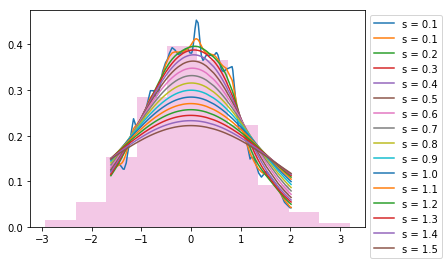

In [9]:
sim =1
i = 4
for j in range(len(sigma)):
    plt.plot(ys[i][sim][j],P_hat[i][sim][j], label = 's = {:.1f}'.format(sigma[j]))
plt.legend(bbox_to_anchor=(1, 1))
plt.hist(data[i][sim], alpha = 0.4, density = True)

In [10]:
# [np.empty((N_sim,len(sigma),len(test_data[0])))]

In [11]:
L = np.empty((N_sim, len(N_train),len(sigma)))
for sim in range(N_sim):
    for i in range(len(N_train)):
        for s in range(len(sigma)):    
            L[sim][i][s]= sum(np.log(P_hat[i][sim][s]))
L_mean = np.mean(L, axis = 0)
L_std = np.std(L, axis = 0)

In [12]:
L_mean.shape

(5, 16)

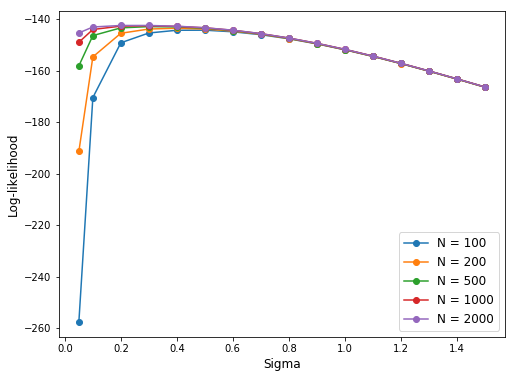

In [31]:
plt.figure(figsize = (8,6))
for i in range(len(N_train)):
    plt.plot(sigma, L_mean[i], label = 'N = {}'.format(N_train[i]), marker = 'o')
#     plt.fill_between(sigma, L_mean[i]- L_std[i],L_mean[i]+ L_std[i], alpha = 0.3)
#     plt.errorbar(sigma, L_mean[i], yerr = L_std[i], label = 'N = {}'.format(N_train[i]))
plt.ylabel('Log-likelihood', fontsize = 12 )
plt.xlabel('Sigma', fontsize = 12)
plt.legend(loc = 'lower right', fontsize = 12)

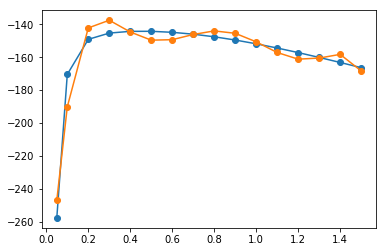

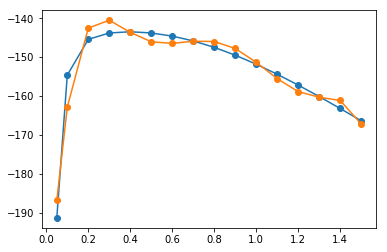

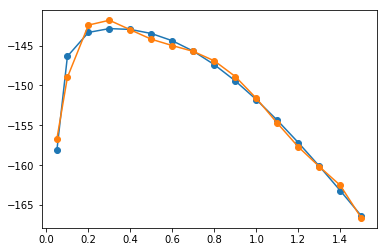

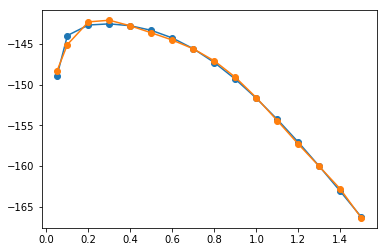

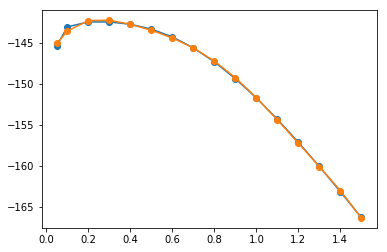

In [70]:
opt_s = np.empty(len(N_train))
for i in range(len(N_train)):
    curve = np.poly1d(np.polyfit(sigma, L_mean[i], 6))
    plt.figure()
    plt.plot(sigma, L_mean[i], label = 'N = {}'.format(N_train[i]), marker = 'o')
    plt.plot(sigma, curve(sigma), label = 'N = {}'.format(N_train[i]), marker = 'o')
    y = np.linspace(0.05, 1.5, 1000)
    opt_s[i] = y[np.argmax(curve(y))]
    #opt_s[i] = - curve[1]/(2*curve[0])

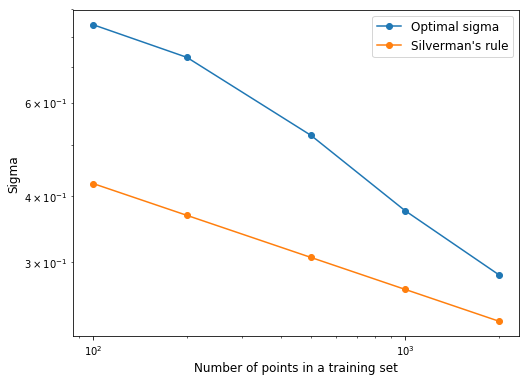

In [66]:
plt.figure(figsize = (8,6))
plt.loglog(N_train, opt_s, label = 'Optimal sigma', marker = 'o')
plt.loglog(N_train, 1.06*np.array(N_train)**(-0.2), label = "Silverman's rule",  marker = 'o')
plt.xlabel('Number of points in a training set',  fontsize = 12)
plt.ylabel('Sigma',  fontsize = 12)
plt.legend( fontsize = 12)